<a href="https://colab.research.google.com/github/Alfaturachman/travelling-salesman-problem/blob/main/Traveling_Salesman_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriks Jarak:
[0, 116.23639863667327, 664.2538941449949, 202.88411115973838, 112.47887554810156, 36.60065494850121, 632.3085584826649, 396.50401592533717, 82.71477457133427, 86.25449620231079]
[116.23639863667327, 0, 569.4500822027082, 111.67794128269682, 203.61767998120132, 82.64097896621536, 539.0552164922437, 307.9915633660951, 37.5731641661621, 46.304321624824574]
[664.2538941449949, 569.4500822027082, 0, 462.8723726018325, 769.791457457094, 642.2831559058134, 34.04568804906795, 268.5155018192611, 605.6067901907733, 615.7364496506411]
[202.88411115973838, 111.67794128269682, 462.8723726018325, 0, 306.97712409534597, 179.41090912940405, 431.55845406657494, 197.70550974092163, 144.94052254325968, 157.01219055860744]
[112.47887554810156, 203.61767998120132, 769.791457457094, 306.97712409534597, 0, 127.68703204624502, 738.5334583882394, 503.8894039606614, 166.17463592280214, 158.99415306569335]
[36.60065494850121, 82.64097896621536, 642.2831559058134, 179.41090912940405, 127.687032046

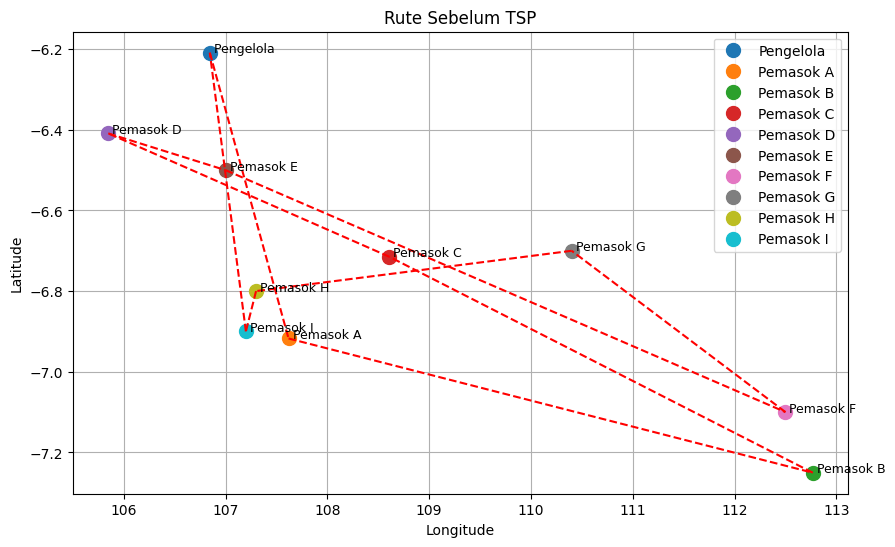


Urutan Lokasi Setelah TSP:
Pengelola
Pemasok E
Pemasok H
Pemasok I
Pemasok A
Pemasok C
Pemasok G
Pemasok F
Pemasok B
Pemasok D
Pengelola

Total Jarak Setelah TSP: 1607.34 km


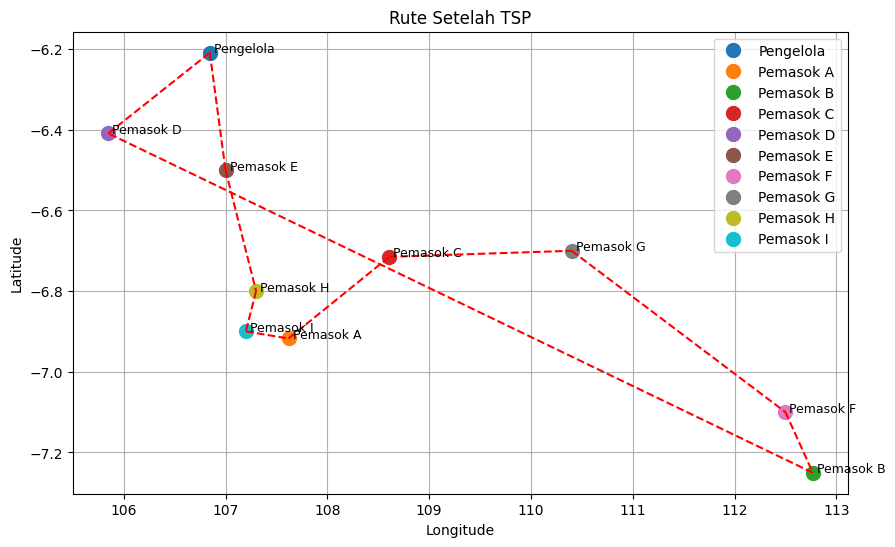

In [ ]:
import math
import matplotlib.pyplot as plt

# Haversine Formula untuk menghitung jarak antara dua titik berdasarkan koordinat lintang dan bujur
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Fungsi menghasilkan matriks jarak yang digunakan untuk menghitung jarak antar semua pasangan lokasi
def calculate_distance_matrix(locations):
    n = len(locations)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = haversine_distance(
                    locations[i]["lat"], locations[i]["lon"],
                    locations[j]["lat"], locations[j]["lon"]
                )
    return distance_matrix

# Algoritma Nearest Neighbor yang mencoba menemukan solusi untuk masalah TSP dengan memilih kota terdekat yang belum dikunjungi secara berurutan
def nearest_neighbor_tsp(distance_matrix):
    n = len(distance_matrix)
    visited = [False] * n
    tour = [0]  # Mulai dari titik awal (index 0)
    visited[0] = True
    total_distance = 0

    for _ in range(n - 1):
        current = tour[-1]
        nearest_distance = float("inf")
        nearest_neighbor = -1
        for i in range(n):
            if not visited[i] and distance_matrix[current][i] < nearest_distance:
                nearest_distance = distance_matrix[current][i]
                nearest_neighbor = i
        tour.append(nearest_neighbor)
        visited[nearest_neighbor] = True
        total_distance += nearest_distance

    # Kembali ke titik awal
    total_distance += distance_matrix[tour[-1]][tour[0]]
    tour.append(0)

    return tour, total_distance

# Visualisasi rute dengan Matplotlib
def plot_route(locations, tour, title):
    plt.figure(figsize=(10, 6))

    # Plot lokasi
    for i, loc in enumerate(locations):
        plt.plot(loc["lon"], loc["lat"], 'o', markersize=10, label=loc["name"])
        plt.text(loc["lon"], loc["lat"], f" {loc['name']}", fontsize=9)

    # Plot garis rute
    for i in range(len(tour) - 1):
        start = locations[tour[i]]
        end = locations[tour[i + 1]]
        plt.plot([start["lon"], end["lon"]], [start["lat"], end["lat"]], 'r--')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Data lokasi (contoh koordinat)
locations = [
    {"name": "Pengelola", "lat": -6.2088, "lon": 106.8456},
    {"name": "Pemasok A", "lat": -6.9175, "lon": 107.6191},
    {"name": "Pemasok B", "lat": -7.2504, "lon": 112.7688},
    {"name": "Pemasok C", "lat": -6.7149, "lon": 108.6098},
    {"name": "Pemasok D", "lat": -6.4089, "lon": 105.8480},
    {"name": "Pemasok E", "lat": -6.5000, "lon": 107.0000},
    {"name": "Pemasok F", "lat": -7.1000, "lon": 112.5000},
    {"name": "Pemasok G", "lat": -6.7000, "lon": 110.4000},
    {"name": "Pemasok H", "lat": -6.8000, "lon": 107.3000},
    {"name": "Pemasok I", "lat": -6.9000, "lon": 107.2000},
]

# Hitung matriks jarak
distance_matrix = calculate_distance_matrix(locations)

# Tampilkan matriks jarak
print("Matriks Jarak:")
for row in distance_matrix:
    print(row)

# Sebelum TSP: urutan asli lokasi
print("\nUrutan Lokasi Sebelum TSP:")
for location in locations:
    print(location["name"])

# Visualisasi sebelum TSP
plot_route(locations, list(range(len(locations))) + [0], "Rute Sebelum TSP")

# Setelah TSP
tour, total_distance = nearest_neighbor_tsp(distance_matrix)
print("\nUrutan Lokasi Setelah TSP:")
for index in tour:
    print(locations[index]["name"])

print(f"\nTotal Jarak Setelah TSP: {total_distance:.2f} km")

# Visualisasi setelah TSP
plot_route(locations, tour, "Rute Setelah TSP")


In [ ]:
import math

# Haversine Formula untuk menghitung jarak antara dua titik berdasarkan koordinat lintang dan bujur
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Radius bumi dalam km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Fungsi menghasilkan matriks jarak
def calculate_distance_matrix(locations):
    n = len(locations)
    distance_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i][j] = haversine_distance(
                    locations[i]["lat"], locations[i]["lon"],
                    locations[j]["lat"], locations[j]["lon"]
                )
    return distance_matrix

# Algoritma Nearest Neighbor
def nearest_neighbor_tsp(distance_matrix):
    n = len(distance_matrix)
    visited = [False] * n
    tour = [0]  # Mulai dari titik awal (index 0)
    visited[0] = True
    total_distance = 0

    for _ in range(n - 1):
        current = tour[-1]
        nearest_distance = float("inf")
        nearest_neighbor = -1
        for i in range(n):
            if not visited[i] and distance_matrix[current][i] < nearest_distance:
                nearest_distance = distance_matrix[current][i]
                nearest_neighbor = i
        tour.append(nearest_neighbor)
        visited[nearest_neighbor] = True
        total_distance += nearest_distance

    # Kembali ke titik awal
    total_distance += distance_matrix[tour[-1]][tour[0]]
    tour.append(0)

    return tour, total_distance

# Data lokasi
locations = [
    {"name": "Pengelola", "lat": -6.2088, "lon": 106.8456},
    {"name": "Pemasok A", "lat": -6.9175, "lon": 107.6191},
    {"name": "Pemasok B", "lat": -7.2504, "lon": 112.7688},
    {"name": "Pemasok C", "lat": -6.7149, "lon": 108.6098},
    {"name": "Pemasok D", "lat": -6.4089, "lon": 105.8480},
    {"name": "Pemasok E", "lat": -6.5000, "lon": 107.0000},
    {"name": "Pemasok F", "lat": -7.1000, "lon": 112.5000},
    {"name": "Pemasok G", "lat": -6.7000, "lon": 110.4000},
    {"name": "Pemasok H", "lat": -6.8000, "lon": 107.3000},
    {"name": "Pemasok I", "lat": -6.9000, "lon": 107.2000},
]

# Hitung matriks jarak
distance_matrix = calculate_distance_matrix(locations)

# Sebelum TSP
print("Urutan Lokasi Sebelum TSP:")
for location in locations:
    print(location["name"])

# Setelah TSP
tour, total_distance = nearest_neighbor_tsp(distance_matrix)
print("\nUrutan Lokasi Setelah TSP:")
for index in tour:
    print(locations[index]["name"])

print(f"\nTotal Jarak Setelah TSP: {total_distance:.2f} km")


Urutan Lokasi Sebelum TSP:
Pengelola
Pemasok A
Pemasok B
Pemasok C
Pemasok D
Pemasok E
Pemasok F
Pemasok G
Pemasok H
Pemasok I

Urutan Lokasi Setelah TSP:
Pengelola
Pemasok E
Pemasok H
Pemasok I
Pemasok A
Pemasok C
Pemasok G
Pemasok F
Pemasok B
Pemasok D
Pengelola

Total Jarak Setelah TSP: 1607.34 km



Rute Sebelum TSP


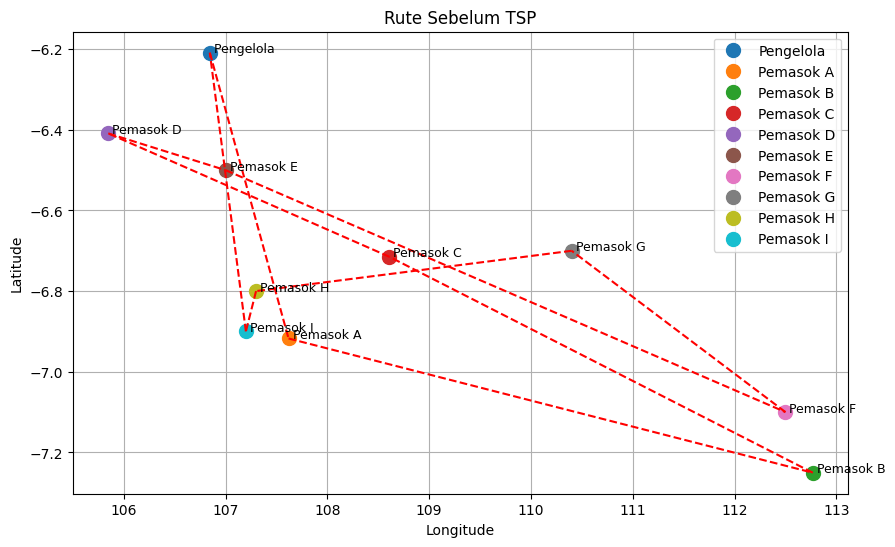


Rute Setelah TSP


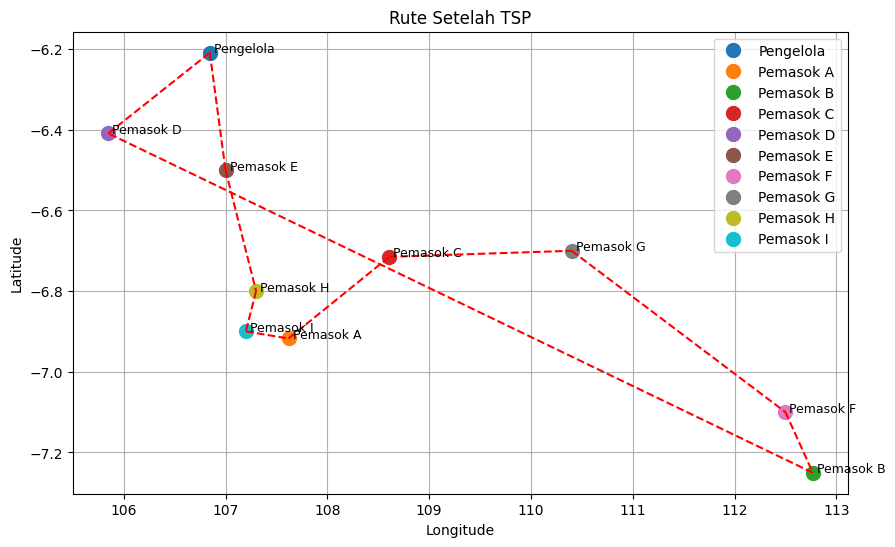

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk memplot rute
def plot_route(locations, tour, title):
    plt.figure(figsize=(10, 6))

    # Plot lokasi
    for i, loc in enumerate(locations):
        plt.plot(loc["lon"], loc["lat"], 'o', markersize=10, label=loc["name"])
        plt.text(loc["lon"], loc["lat"], f" {loc['name']}", fontsize=9)

    # Plot garis rute
    for i in range(len(tour) - 1):
        start = locations[tour[i]]
        end = locations[tour[i + 1]]
        plt.plot([start["lon"], end["lon"]], [start["lat"], end["lat"]], 'r--')

    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualisasi sebelum TSP
print("\nRute Sebelum TSP")
plot_route(locations, list(range(len(locations))) + [0], "Rute Sebelum TSP")

# Visualisasi setelah TSP
print("\nRute Setelah TSP")
plot_route(locations, tour, "Rute Setelah TSP")
